Making a Map in PyGMT

As a geologist one common task is to plot data points on a map. Here I will use PyGMT tools (https://www.pygmt.org/latest/) to make a few basic maps. PyGMT is a python wrapper for the current Generic Mapping Tools V6.0 and a very powerful tool to create maps and other figures. Note that in a professional setting a Google map is not an acceptable figure for publication. For publication, map figures are generally generated using a GIS program or GMT.

In this example, I will use external files with data to plot information on a map. Be sure to look at the examples and tutorials on the PyGMT website. Like learning a musical instrument, learning codes/coding takes practice, patience and many mistakes along the way. 





The first step in any code is to load the libraries (aka pre-written standard codes) that you want to use.

Here I am loading a number of libraries:

pygmt: the PyGMT library
pandas: The pandas library is used to load and manipulate data in dataframes (akin to tables in excel)
numpy: The Numerical recipes for python (often used for things like regressions, math, etc).
xarray: An array handler used to work with labelled multi-dimensional arrays 
netCDf4: Library used to read and use netCDF files (a common file type for bathymetry and topography)
matplotlib: The library for plotting in Python

In [2]:
import pygmt  
import pandas as pd
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib as plt
import matplotlib.dates as mdates

Now that the libraries are loaded. The next step is to do some minor set-up. This is very stylistic as coding is a bit like writing. I have a tendency to like creating variables that I may change to create different figures at the top of the code. Other coders like to place this information where it will be used. 

In [15]:
#The netCDF grid containing the bathymetry/topography I wamt to use for the map
#Here I am using an old GEBCO grid. You can download custom grids from the NOAA NCEI
# Note the current GEBCO 2021 grid is citable as : 
#GEBCO Compilation Group (2021) GEBCO 2021 Grid (doi:10.5285/c6612cbe-50b3-0cff-e053-6c86abc09f8f)
#Data download site: https://www.gebco.net/data_and_products/gridded_bathymetry_data/
# 
# Example for locating a file not in the folder where you are working
#grid = '/Users/evanacore/data/gebco_2019_n22.0_s15.0_w-75.0_e-60.0.nc'
grid = 'gebco_2019_n22.0_s15.0_w-75.0_e-60.0.nc'

#Next I will read and load a CSV file containing the GEMS faults into a dataframe (a bit like a labeled table)
#I will then print the dataframe to the screen to ensure it was read correctly
# See https://github.com/GEMScienceTools/gem-global-active-faults for details on the model
#Citation:
#Styron, Richard, and Marco Pagani. “The GEM Global Active Faults Database.” Earthquake Spectra, vol. 36, no. 1_suppl, Oct. 2020, pp. 160–180, doi:10.1177/8755293020944182.
#faultfile = '/Users/evanacore/data/central_am_carib_faults-master/gmt/faults_pands.csv'

faultfile = 'faults_pands.csv'
df_faults = pd.read_csv(faultfile, delimiter=',')
df_faults = pd.DataFrame(df_faults)
print(df_faults)


#Next I will create the lat/lon limite of the map
wlon= -69.0
elon= -64.5
slat = 17.0
nlat = 20.0

#Now to set the projection for the Map for details see the PyGMT docuementation see: https://www.pygmt.org/latest/projections/index.html
#Here I will use a Mercator Projection to make a figure 10cm wide M-Mercator, 10c - size
proj = 'M10c'

#I will also load the PRSN seismic stations into another dataframe for later use. The file name must tell the computer
# where the file is located (relative or absolute name)
#PRSN='/Users/evanacore/data/IRIS_PR_STNS.csv'
PRSN='IRIS_PR_STNS.csv'
PRSN_df = pd.read_csv(PRSN, delimiter=',')
#PRSN_df = pd.DataFrame(PRSN_df)
print(PRSN_df)

     Type                 Name        lon        lat
0       S       Tuxtla-Malpaso -93.647518  16.983588
1       S       Tuxtla-Malpaso -93.585914  16.974254
2       S       Tuxtla-Malpaso -93.544845  16.963054
3       S       Tuxtla-Malpaso -93.501909  16.948119
4       S       Tuxtla-Malpaso -93.466440  16.935052
...   ...                  ...        ...        ...
9142    T  North_Panama_Deform -81.219308   9.777355
9143    T  North_Panama_Deform -81.183847   9.845911
9144    T  North_Panama_Deform -81.155479   9.867187
9145    T  North_Panama_Deform -81.105835   9.893192
9146    T  North_Panama_Deform -81.044370   9.914468

[9147 rows x 4 columns]
   NET STATION CHANNEL        LAT        LON
0   GS    PR01     HHZ  18.034722 -67.067770
1   GS    PR02     HHZ  18.012770 -66.770000
2   GS    PR03     HHZ  18.066505 -66.937827
3   GS    PR04     HHZ  17.978330 -66.670560
4   GS    PR05     HHZ  18.046670 -66.860560
5   GS    PR06     HHZ  18.055676 -66.724744
6   IU     SJG     BHZ  

Now that we have the data and varibles loaded, let's make some maps. The first map I will make will be a map with the major faults in the region with no bathymetry.


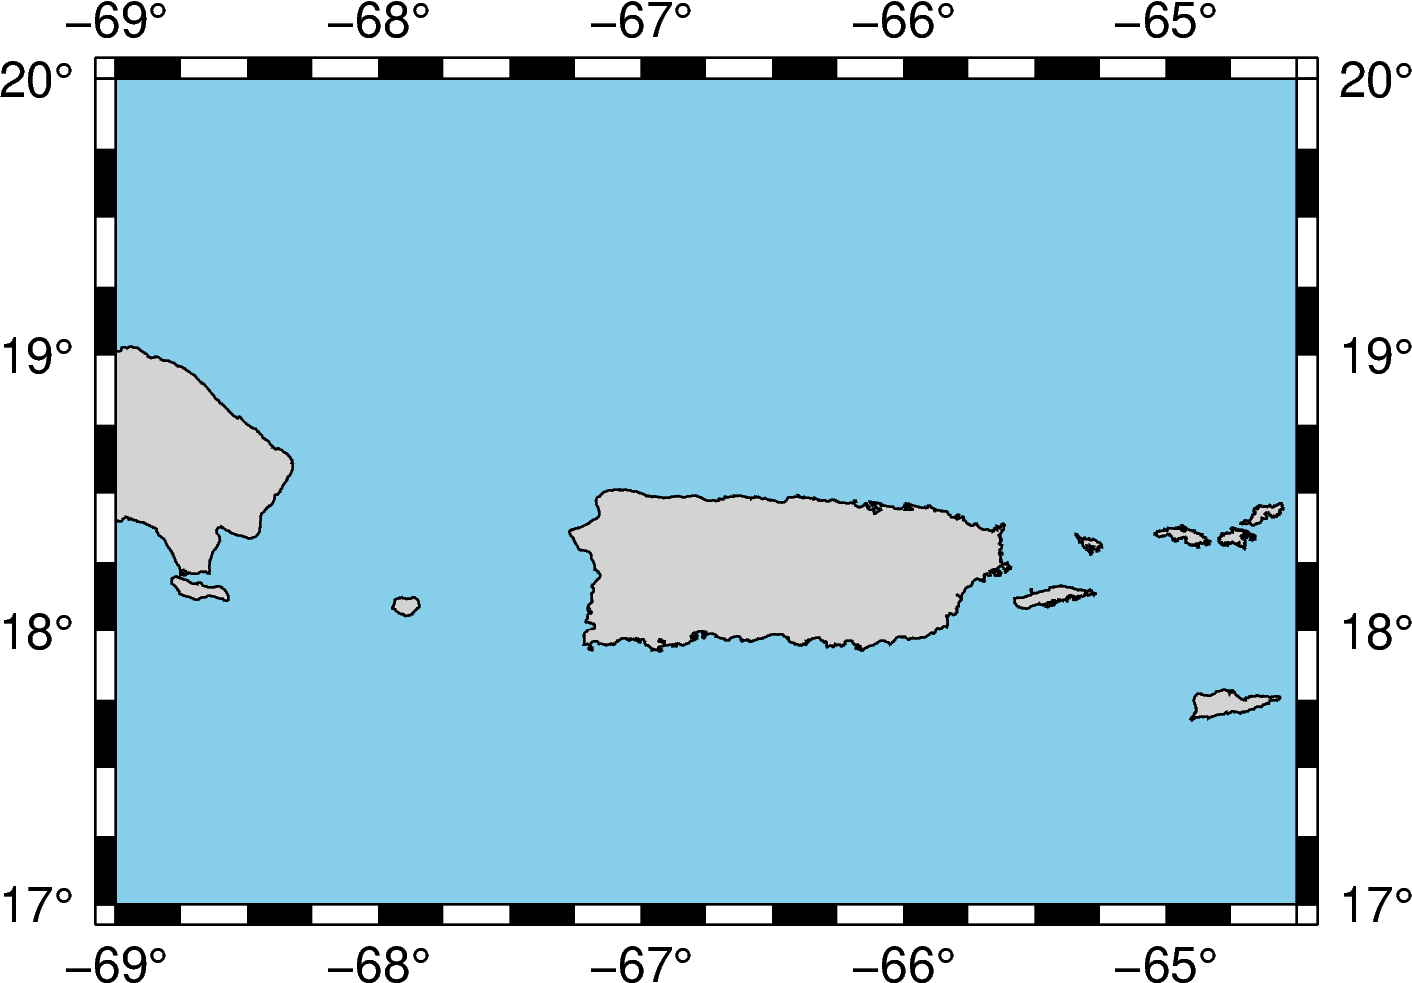

In [16]:
#First step is to open the PyGMT Figure note that now fig will replace the call to pygmt.Figure().
fig = pygmt.Figure()
#Let's plot the coastline!
fig.coast(projection=proj,
          frame='a1f0.25', #this sets the map tick marks and labels..label every 1.0 degree, tick mark every 0,25 degrees
          area_thresh=20, #area threhold = minimum area in km^2 to plot
          region=[wlon,elon,slat,nlat],
          resolution='f', #coastline resultion to use f = full, h= high, i= intermedate l = low c = crude
          land='lightgray', #set the land color
          water='skyblue', #set the water color
          shorelines="0.5p,black") #set the shoreline pen
fig.show()

Now you have a basic map of the NE Caribe. We can now add more information onto this map. Let's start by adding the faults from the GEMS archive. We will use the same base and add the faults on top. 


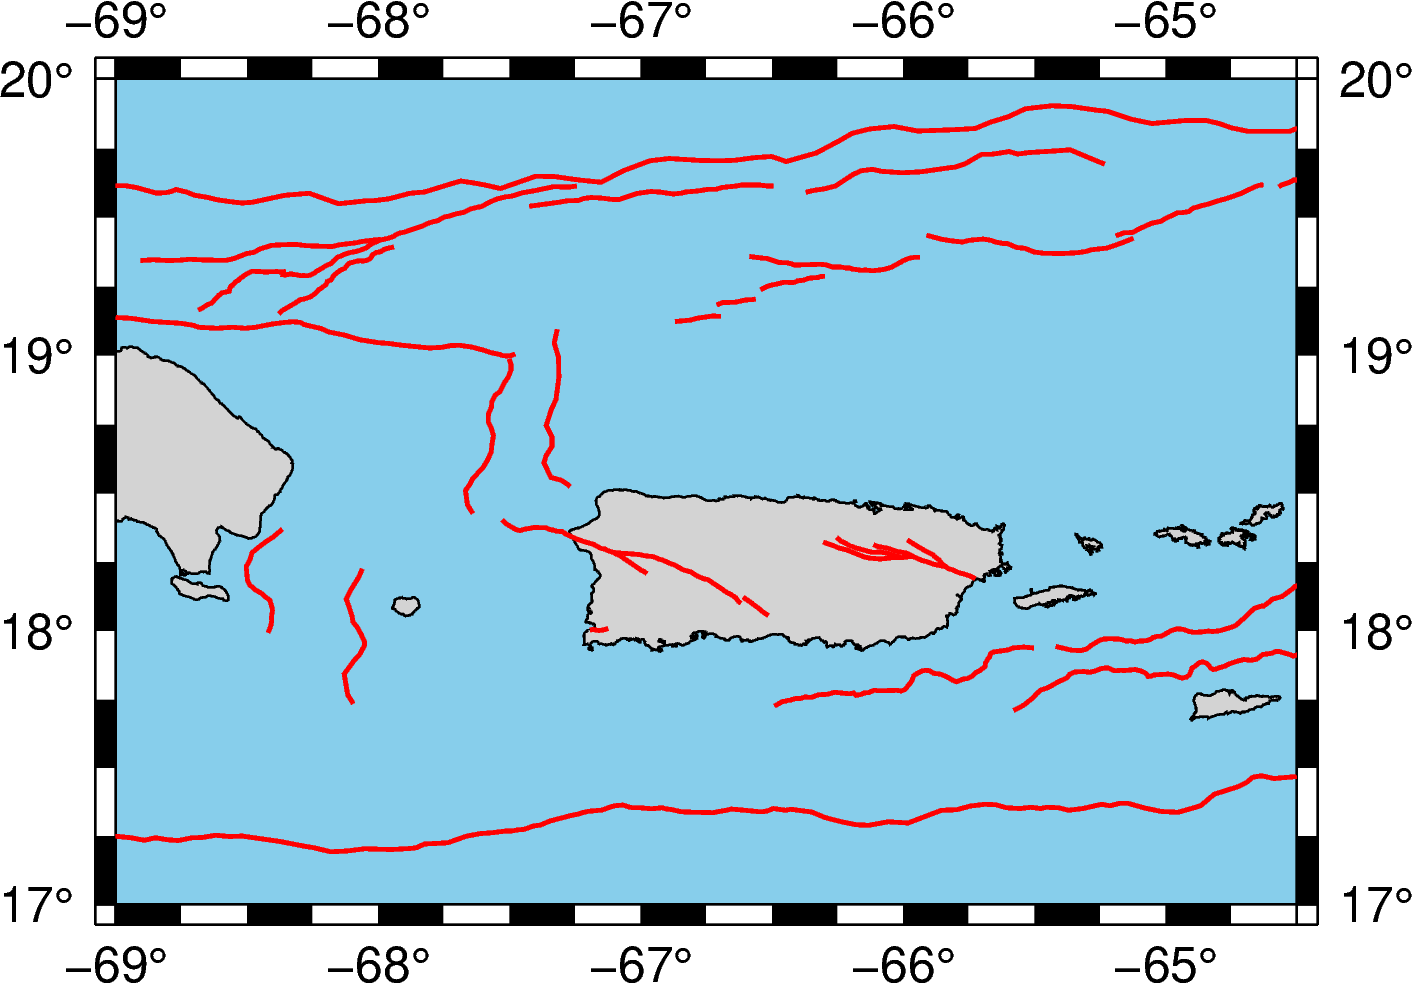

In [18]:
#First step is to open the PyGMT Figure note that now fig will replace the call to pygmt.Figure().
fig = pygmt.Figure()
#Let's plot the coastline!
fig.coast(projection=proj,
          frame='a1f0.25', #this sets the map tick marks and labels..label every 1.0 degree, tick mark every 0,25 degrees
          area_thresh=20, #area threhold = minimum area in km^2 to plot
          region=[wlon,elon,slat,nlat],
          resolution='f', #coastline resultion to use f = full, h= high, i= intermedate l = low c = crude
          land='lightgray', #set the land color
          water='skyblue', #set the water color
          shorelines="0.5p,black") #set the shoreline pen

####################################################
#Above this line is the same as the last step.
#Now let's add the faults
#Before going further take a look back at the faults data. If you simply plotted a line connecting the lats and lons
# what would happen? 
#To plot each fault as an individual line we need select the fault name and then plot the line associated with the fault.
#This needs to be repeated for each fault. 
# To do this we use something called a loop. We give instructions to the computer to perform an action for each unique
# fault name. 
# Step 1 get a list of the unique fault names (fnames): the following command uses the pandas library to make
# a list of unique faults within the column defined as Name. Note that the use of Name here is based on what I called 
# the column of the original data csv file. 
###################
# CAUTION! Do not use spaces in these types of names use _ instead....spaces are unweildy in coding!
###################
fnames= df_faults.Name.unique()

#Now that we have the list of faults we need to select the lat,lons of each fault and plot them.
# for each name (i) in fnames do  the next steps
# Note in Python and C/C++ the indents matter. Here the indented lines give the steps to do within the loop
# 
for i in fnames:
## Step 2 select the data for the individual fault using pandas and put it in a junk data frame variable using a logical statement
    gomi = df_faults.loc[df_faults['Name'] == i]
## Step 3 plot the fault
    fig.plot(x = gomi.lon, y = gomi.lat, pen = '1p,red')
##This will repeat for each fault name
###If one decided to get very fancy you can use the fault type and a series of if statements to set different pens
# for different fault types. In the file S-Sinistral, D-Dextral, T-Thrust, R-reverse, N -Normal, U-Unknown, 
# combination of the letters e.g. DN indicate oblique faults with the domninant motion letter first.
fig.show()


The next step is make the map even fancier by adding the bathymetry and topography. The difference here is that instead of plotting the coastlines we will plot the bathymetry/topography from a NetCDF grid file (.nc or .grd)

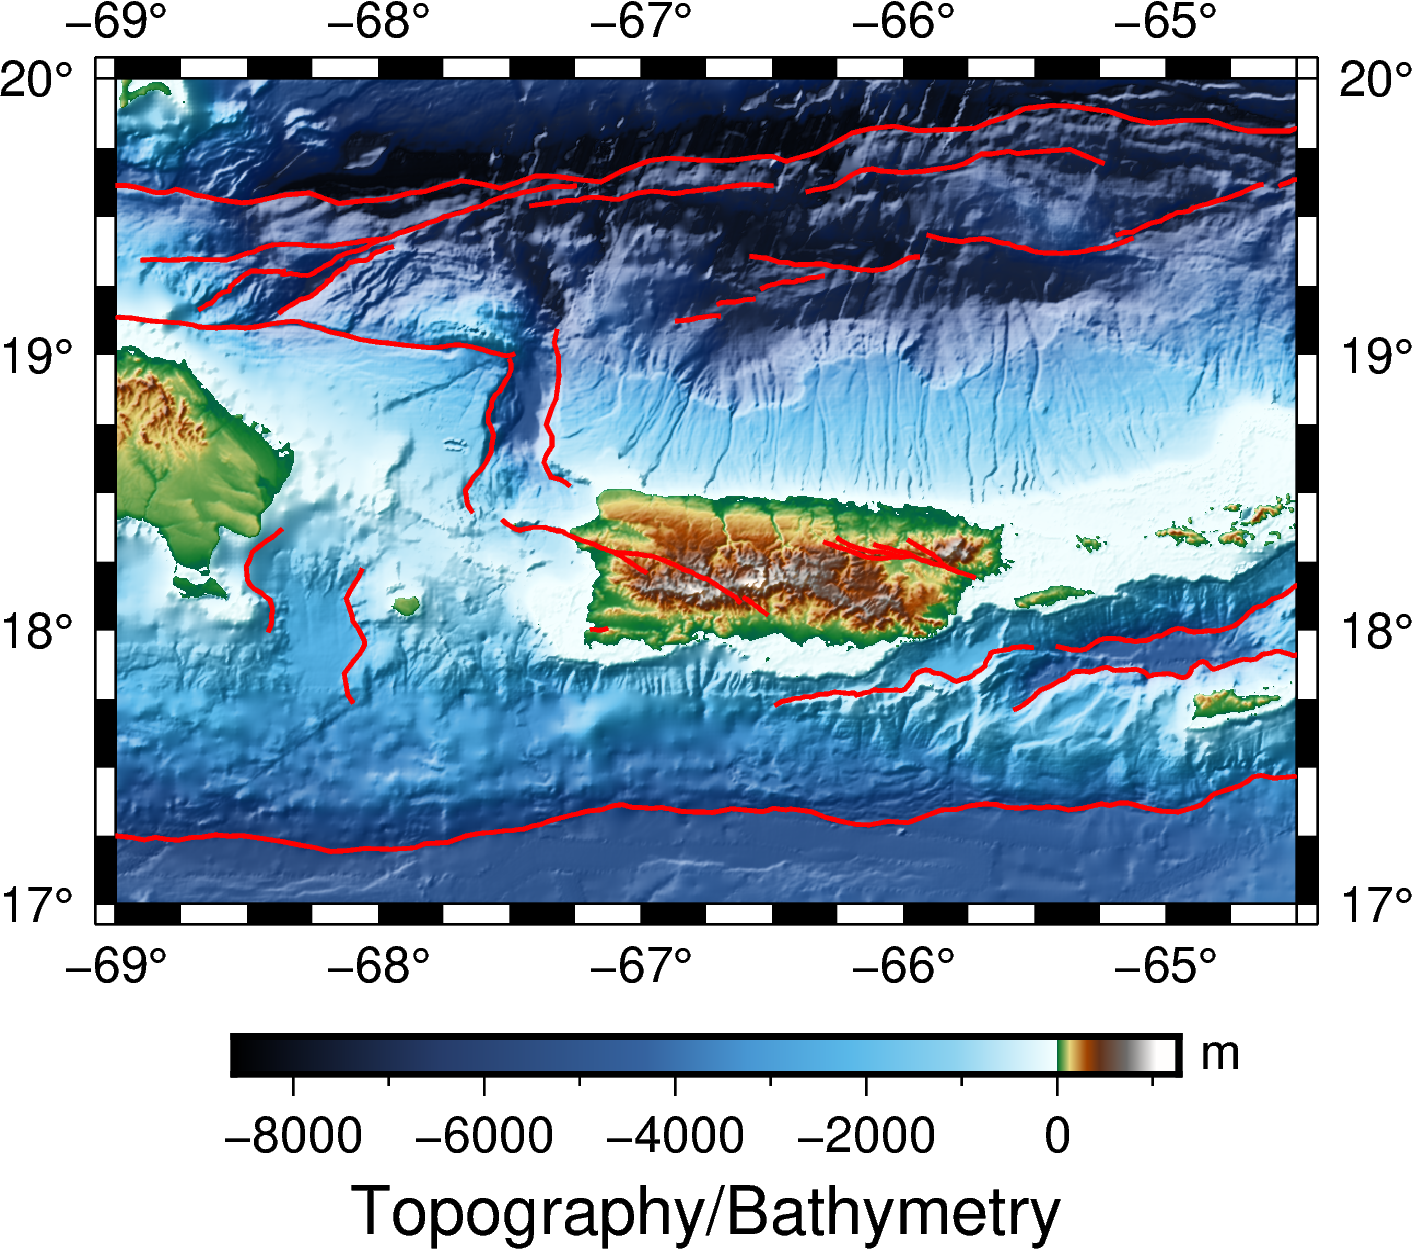

In [23]:
fig = pygmt.Figure()
fig.grdimage(grid, 
             projection=proj, 
             frame="a1f0.25",
             cmap="geo", #tells the code what color map aka colorbar to use. Geo is teh classic one you see on globes
             region=[wlon,elon,slat,nlat],
             shading=True) #Turns on shading; I find it looks nicer


###This is the same as before to plot the faults.
fnames= df_faults.Name.unique()

#Now that we have the list of faults we need to select the lat,lons of each fault and plot them.
# for each name (i) in fnames do  the next steps
# Note in Python and C/C++ the indents matter. Here the indented lines give the steps to do within the loop
# 
for i in fnames:
## Step 2 select the data for the individual fault using pandas and put it in a junk data frame variable using a logical statement
    gomi = df_faults.loc[df_faults['Name'] == i]
## Step 3 plot the fault
    fig.plot(x = gomi.lon, y = gomi.lat, pen = '1p,red')
##This will repeat for each fault name
###If one decided to get very fancy you can use the fault type and a series of if statements to set different pens
# for different fault types. In the file S-Sinistral, D-Dextral, T-Thrust, R-reverse, N -Normal, U-Unknown, 
# combination of the letters e.g. DN indicate oblique faults with the domninant motion letter first.

# Now let's add a colorbar
fig.colorbar(frame=["+LTopography/Bathymetry", "y+lm"])
fig.show()

You have now produced a map with the major faults as well as the Bathymetry/Topography of the region. We can take this a step futher by adding point data. Here you will add seismic station locations. 



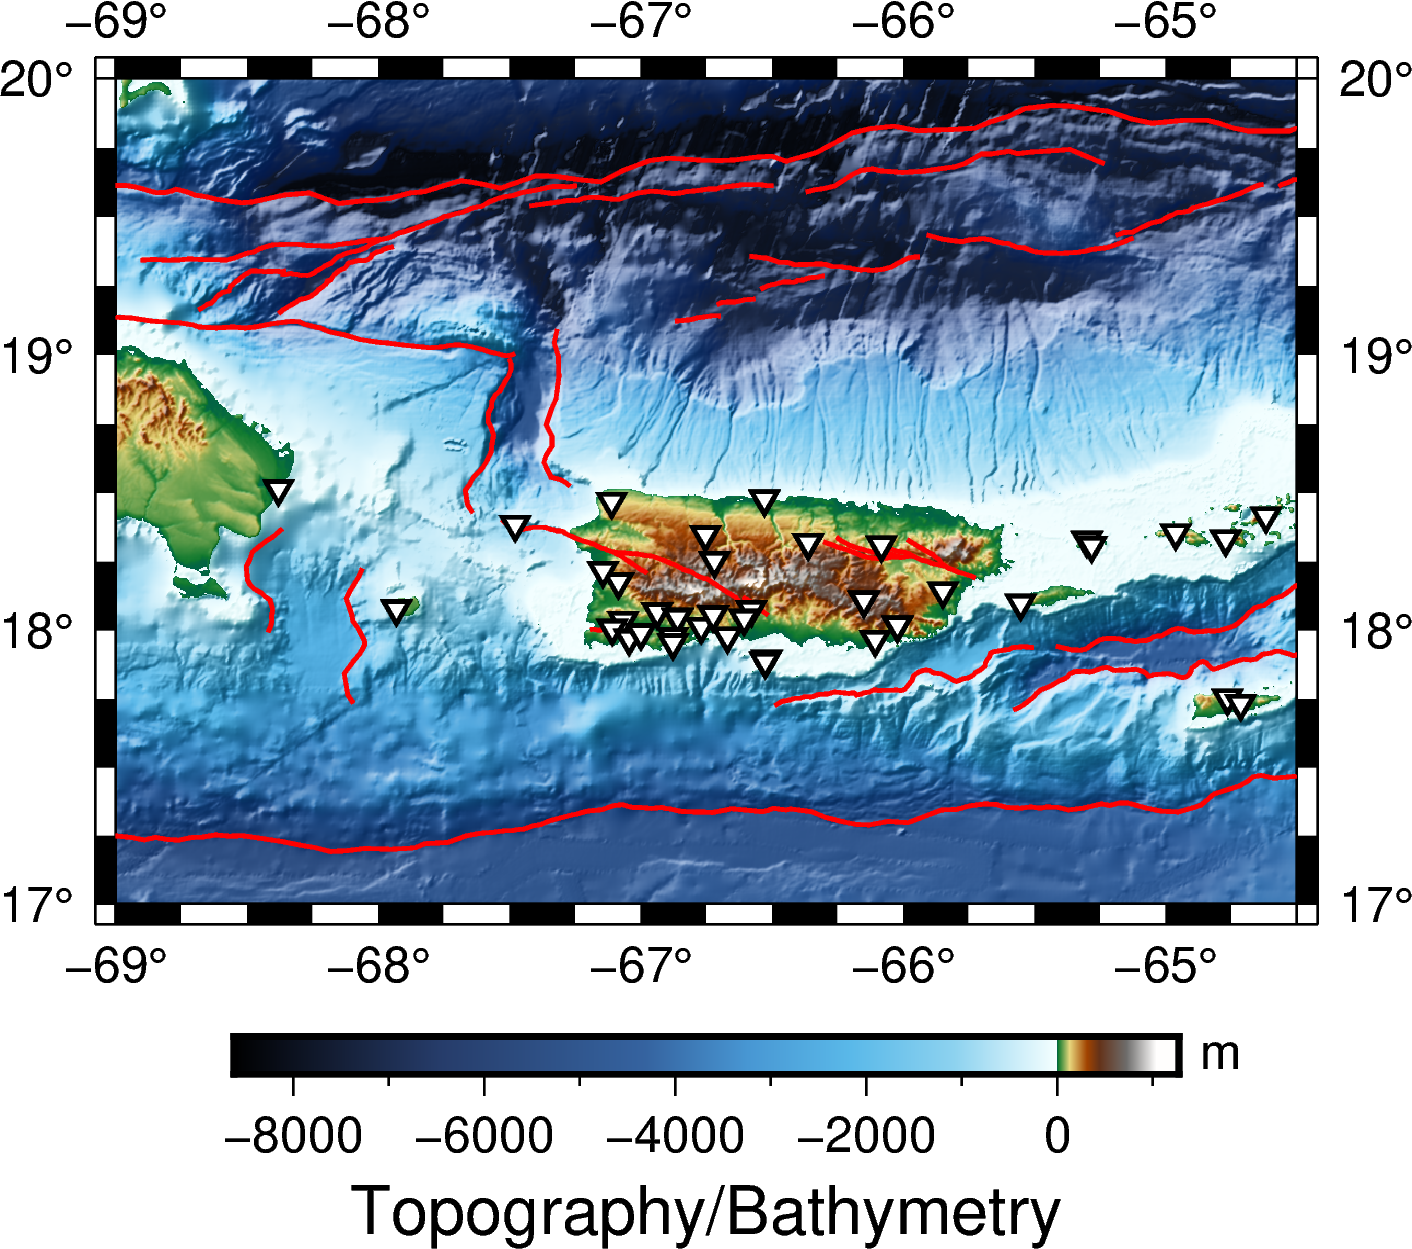

In [25]:
#The first part is a repeat of before with creating the last image we generated
fig = pygmt.Figure()
fig.grdimage(grid, 
             projection=proj, 
             frame="a1f0.25",
             cmap="geo", #tells the code what color map aka colorbar to use. Geo is teh classic one you see on globes
             region=[wlon,elon,slat,nlat],
             shading=True) #Turns on shading; I find it looks nicer
fnames= df_faults.Name.unique()
for i in fnames:
## Step 2 select the data for the individual fault using pandas and put it in a junk data frame variable using a logical statement
    gomi = df_faults.loc[df_faults['Name'] == i]
## Step 3 plot the fault
    fig.plot(x = gomi.lon, y = gomi.lat, pen = '1p,red')

#Now let's plot the stations
#Here the x locations are the longitude values, the y the latitude values
# style defines the shape and size to plot here i = inverted triangle with a size of 0.15cm
# color is the color of the marker, pen the outline thickness and color
fig.plot(x = PRSN_df.LON, y = PRSN_df.LAT, style="i0.25c", color='white', pen='1p,black')
    
    
fig.colorbar(frame=["+LTopography/Bathymetry", "y+lm"])
fig.show()